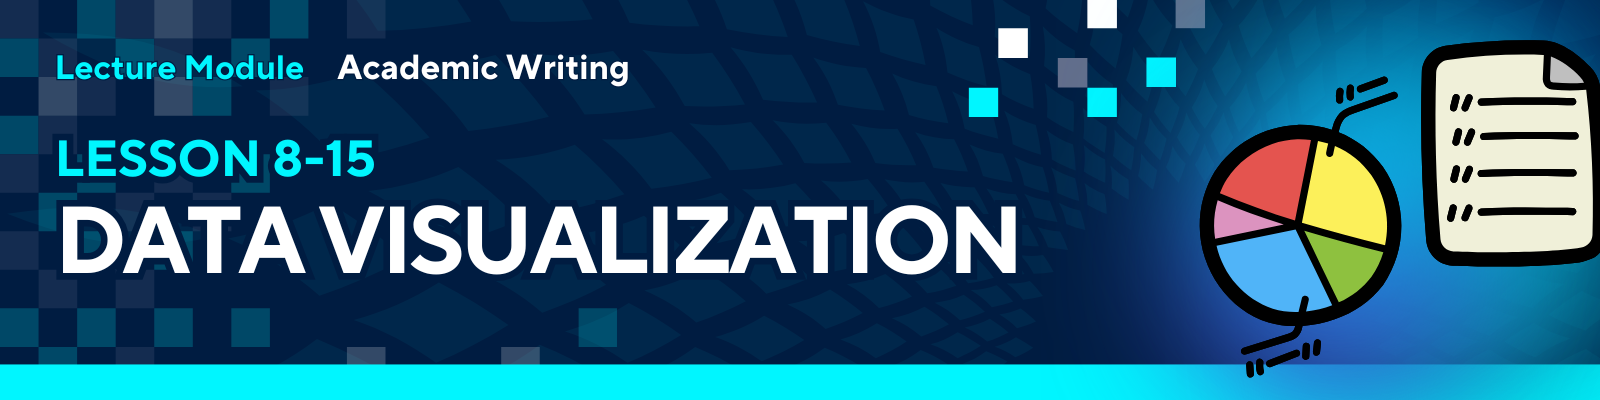

**Settings and Packages Preparation**<br>< <font color="red">**!**</font> > Run the following code whenever you open this workbook

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
#plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename, low_memory=False) if os.path.exists(filename) else pd.read_csv(url, low_memory=False).to_csv(filename, index=False) or pd.read_csv(filename, low_memory=False)

# If error, uncomment this
#life_expectancy = load_dataset("https://www.dropbox.com/scl/fi/8vwam1u436lxn3d6qnf62/life_expectancy.csv?rlkey=aj5r2a8n44jo9swhcnuoo7fd5&st=r58zl09e&dl=0&raw=1", "life_expectancy.csv")
#city_temperature = load_dataset("https://www.dropbox.com/scl/fi/s4y96dto8d9vu20ao5du5/city_temperature.csv?rlkey=ppohfggy8i8v329y1dg9ub5p6&st=fuf9bpzy&dl=0&raw=1", "city_temperature.csv")

life_expectancy = load_dataset("https://www.dropbox.com/s/jr72bb2bpcxo725/life_expectancy.csv?raw=1", "life_expectancy.csv")
city_temperature = load_dataset("https://www.dropbox.com/s/d56yws7bkn3eeam/city_temperature.csv?raw=1", "city_temperature.csv")

UGLY, BAD, WRONG = "\033[33m╔\033[0m 😖 \033[33;1mUGLY!\033[0m \033[33m═══════════════════════════════\033[0m", "\033[35m╔\033[0m 👎 \033[35;1mBAD!\033[0m \033[35m═══════════════════════════════\033[0m", "\033[31m╔\033[0m ❌ \033[31;1mWRONG!\033[0m \033[31m═══════════════════════════════\033[0m"



---



<img src="https://i.imgur.com/dbvwS08.png" width=900 />


# <font color="#B0AD89"><strong>2 ⫶ </strong></font><strong>VISUALIZING AMOUNTS & DISTRIBUTIONS</strong>

# <font color="#B0AD89"><strong>Part A ⫶⫶ </strong></font>Visualizing Amounts

<img src="https://i.imgur.com/0sjVUlo.png" width=700 />


## <font color="#B0AD89"><strong>2.1 ⫶ </strong></font>Bar Plots


<img src="https://i.imgur.com/hszdL6U.png" width=700 />



<img src="https://i.imgur.com/gPQ2RL2.png" width=700 />

In [2]:
# Define list of hot cities
hot_cities = ["Kuwait", "Doha", "Delhi", "Phoenix", "Dubai", "Muscat"]

# Filter and aggregate the data
hot_days = city_temperature[
    (city_temperature['Year'] == 2010) &
    (city_temperature['AvgTemperature'] > 90) &
    (city_temperature['City'].isin(hot_cities))
].groupby('City').size().reset_index(name='Number_Hot_Days')

print(hot_days)

      City  Number_Hot_Days
0    Delhi               80
1     Doha              152
2    Dubai              152
3   Kuwait              149
4   Muscat               69
5  Phoenix               93


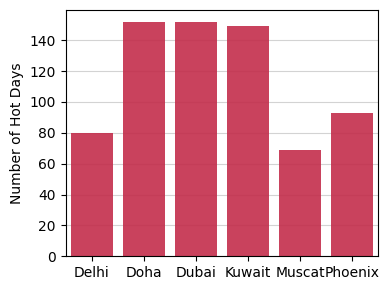

In [3]:
# Set the figure size
plt.figure(figsize=(4, 3))

# Create bar plot using histplot (barplot also ok but not as versatile)
sns.barplot(data=hot_days,
            x='City',
            y='Number_Hot_Days',
            color='crimson',
            alpha=0.9,
            zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=-1)

# Start y-axis at 0
plt.gca().set_ylim(bottom=0)

# Set labels
plt.xlabel('')  # Remove x-label
plt.ylabel('Number of Hot Days')

# Adjust layout and display
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/ydo983A.png" width=700 />

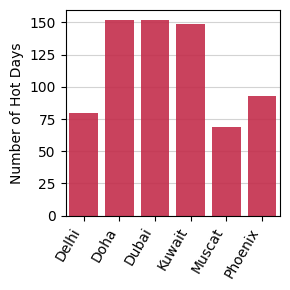

In [4]:
# Set the figure size
plt.figure(figsize=(3, 3))

# Create bar plot using histplot (barplot also ok but not as versatile)
sns.barplot(data=hot_days,
            x='City',
            y='Number_Hot_Days',
            color='crimson',
            alpha=0.9,
            zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=-1)

# Start y-axis at 0
plt.gca().set_ylim(bottom=0)

# Set labels
plt.xlabel('')  # Remove x-label
plt.ylabel('Number of Hot Days')
plt.xticks(rotation=60, ha='right')

# Adjust layout and display
plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/Kk5frUX.png" width=700 />

╔ 👎 BAD! ═══════════════════════════════


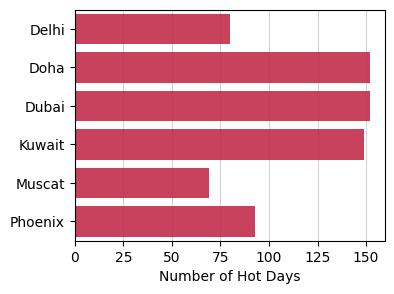

In [5]:
# Print the BAD notification
print(BAD)

# Create figure with specified size
plt.figure(figsize=(4, 3))

# Create horizontal bar plot
sns.barplot(data=hot_days,
            x='Number_Hot_Days',
            y='City',
            color='crimson',
            alpha=0.9,
            zorder=2)

# Set y-axis grid
plt.grid(axis='x', color='lightgrey', linestyle='-', zorder=-1)

# Set labels
plt.xlabel('Number of Hot Days')
plt.ylabel('')  # Remove y-label

plt.show()

<img src="https://i.imgur.com/938oADk.png" width=700 />

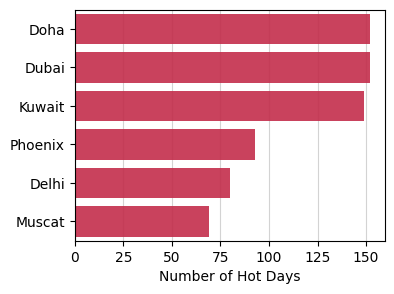

In [6]:
# Create figure with specified size
plt.figure(figsize=(4, 3))

# Sort the data by Number_Hot_Days
hot_days_sorted = hot_days.sort_values('Number_Hot_Days', ascending=False)

# Create horizontal bar plot
sns.barplot(data=hot_days_sorted,
           y='City',
           x='Number_Hot_Days',
           color='crimson',
           alpha=0.9,
           zorder=2)

# Set y-axis grid
plt.grid(axis='x', color='lightgrey', linestyle='-', zorder=-1)

# Set labels
plt.xlabel('Number of Hot Days')
plt.ylabel('')  # Remove y-label

plt.show()

<img src="https://i.imgur.com/Mt0NK8J.png" width=700 />

In [7]:
import calendar
# Filter data for Dubai's hot days in 2010
dubai_hot_days = city_temperature[
    (city_temperature['Year'] == 2010) &
    (city_temperature['AvgTemperature'] > 90) &
    (city_temperature['City'] == "Dubai")
].groupby('Month').size().reset_index(name='n')

# Create a complete set of months (1-12)
all_months = pd.DataFrame({'Month': range(1, 13)})

# Merge with our data to include months with zero hot days
dubai_hot_days = pd.merge(all_months, dubai_hot_days, on='Month', how='left')
dubai_hot_days['n'] = dubai_hot_days['n'].fillna(0)

# Convert month numbers to abbreviated month names
month_map = {i: m for i, m in enumerate(calendar.month_abbr[1:], 1)}
dubai_hot_days['Month'] = dubai_hot_days['Month'].map(month_map)

# Make sure the output is properly sorted by month
dubai_hot_days = dubai_hot_days.reset_index(drop=True)

print(dubai_hot_days)

   Month     n
0    Jan   0.0
1    Feb   0.0
2    Mar   1.0
3    Apr   1.0
4    May  21.0
5    Jun  30.0
6    Jul  31.0
7    Aug  31.0
8    Sep  27.0
9    Oct  10.0
10   Nov   0.0
11   Dec   0.0


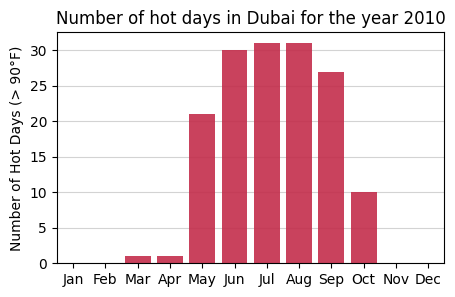

In [8]:
# Set figure size
plt.figure(figsize=(5, 3))

# Create bar plot
sns.barplot(data=dubai_hot_days,
             x='Month',
             y='n',
             color='crimson',
             alpha=0.9,
             zorder=2)


# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=-1)

# Set labels
plt.xlabel('')  # Remove x-label
plt.ylabel('Number of Hot Days (> 90°F)')
plt.title("Number of hot days in Dubai for the year 2010")
plt.show()

<img src="https://i.imgur.com/uzTykTa.png" width=700 />

╔ 👎 BAD! ═══════════════════════════════


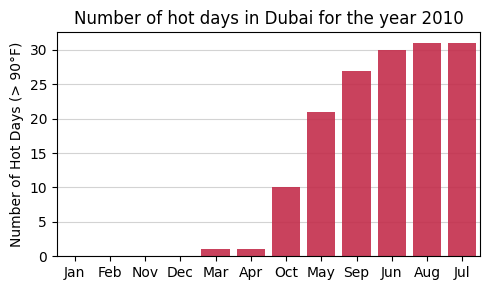

In [9]:
# Print the BAD notification
print(BAD)

# Set figure size
plt.figure(figsize=(5, 3))

# Create bar plot
sns.barplot(data=dubai_hot_days.sort_values('n'),
           x='Month',
           y='n',
           color='crimson',
           alpha=0.9,
           zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Start y-axis at 0
plt.gca().set_ylim(bottom=0)

# Set labels
plt.xlabel('')  # Remove x-label
plt.ylabel('Number of Hot Days (> 90°F)')
plt.title("Number of hot days in Dubai for the year 2010")

# Adjust layout
plt.tight_layout()

plt.show()

## <font color="#B0AD89"><strong>  Practice 2.1 ᆢ</strong></font>ᆢᆢ
The following graph shows the number of days under 0 degree for the top 10 big coldest cities in US for the year 2010. Fix the graph.


In [10]:
# Data Preparation
coldest_US_cities = (city_temperature[
   (city_temperature['Year'] == 2010) &
   (city_temperature['Country'] == "US")
]
# Drop missing values and create City_State column
.dropna()
.assign(City_State=lambda x: x['City'] + ', ' + x['State'])
# Group by combined column and calculate metrics
.groupby('City_State')
.agg(
   Avg_Temp=('AvgTemperature', 'mean'),
   Below_0_Days=('AvgTemperature', lambda x: (x < 32).sum())
)
.reset_index()
.sort_values('Avg_Temp')
.head(10))

print(coldest_US_cities)

                    City_State   Avg_Temp  Below_0_Days
50           Fairbanks, Alaska  29.136986           177
6            Anchorage, Alaska  37.635342           131
44           Duluth, Minnesota  41.919178           114
15      Bismarck, North Dakota  42.624658           117
71              Juneau, Alaska  42.725205            61
64             Helena, Montana  43.463836            91
51         Fargo, North Dakota  43.801918           112
22              Caribou, Maine  44.350959            91
59        Great Falls, Montana  44.574247            72
127  Sault Ste Marie, Michigan  44.686575           102


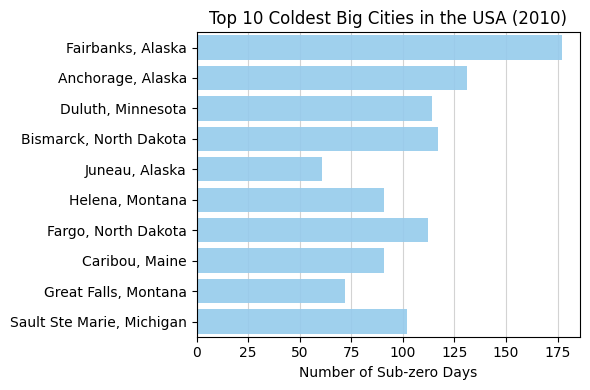

In [18]:
# Create the visualization
plt.figure(figsize=(6, 4))

cold_day_sorted = coldest_US_cities.sort_values("Below_0_Days")

# Create bar plot
sns.barplot(data=coldest_US_cities,
            x='Below_0_Days',
            y='City_State',
            color='lightskyblue',
            alpha=0.9,
            zorder=2)

# Set y-axis grid
plt.grid(axis='x', color='lightgrey', linestyle='-', zorder=0)

# Rotate x labels
# plt.xticks(rotation=75, ha='right')

# Set labels
plt.xlabel('Number of Sub-zero Days')
plt.ylabel('')
plt.title("Top 10 Coldest Big Cities in the USA (2010)")

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

## <font color="#B0AD89"><strong>2.2 ⫶ </strong></font>Grouped and Stacked Bars

<img src="https://i.imgur.com/2ExuKHK.png" width=700 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Grouped Bars

<img src="https://i.imgur.com/nCIs41A.png" width=700 />

In [19]:
# Import calendar if not already imported
import calendar

# Filter and count hot days by city and month
india_hot_days = (city_temperature[
    (city_temperature['Year'] == 2010) &
    (city_temperature['AvgTemperature'] > 85) &
    (city_temperature['Country'] == "India")
]
.groupby(['City', 'Month'])
.size()
.reset_index(name='n'))

# Get all unique cities
cities = india_hot_days['City'].unique()

# Create a complete set of city-month combinations
all_combinations = pd.DataFrame([
    {'City': city, 'Month': month}
    for city in cities
    for month in range(1, 13)
])

# Merge with our data to include all combinations with zero counts
india_hot_days = pd.merge(
    all_combinations,
    india_hot_days,
    on=['City', 'Month'],
    how='left'
)

# Fill missing values with 0
india_hot_days['n'] = india_hot_days['n'].fillna(0)

# Convert month numbers to abbreviated month names
month_map = {i: m for i, m in enumerate(calendar.month_abbr[1:], 1)}
india_hot_days['Month'] = india_hot_days['Month'].map(month_map)

# Sort the data
month_order = {
   'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
   'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
india_hot_days = india_hot_days.sort_values('Month', key=lambda x: x.map(month_order)).reset_index(drop=True)

print(india_hot_days.head(12))

                City Month     n
0    Bombay (Mumbai)   Jan   0.0
1           Calcutta   Jan   0.0
2   Chennai (Madras)   Jan   0.0
3              Delhi   Jan   0.0
4   Chennai (Madras)   Feb   0.0
5    Bombay (Mumbai)   Feb   2.0
6              Delhi   Feb   0.0
7           Calcutta   Feb   0.0
8   Chennai (Madras)   Mar   7.0
9              Delhi   Mar   5.0
10   Bombay (Mumbai)   Mar  10.0
11          Calcutta   Mar  12.0


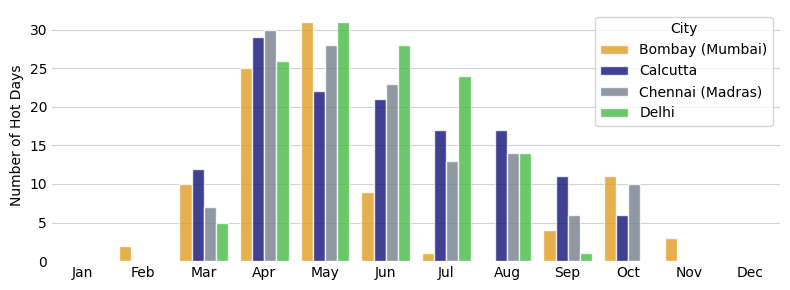

In [20]:
# Set figure size
plt.figure(figsize=(8, 3))

# Create grouped bar plot
sns.barplot(data=india_hot_days,
           x='Month',
           y='n',
           hue='City',
           palette=['orange', 'darkblue', 'slategrey', 'limegreen'],
           edgecolor='white',
           alpha=0.8,
           zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Set labels
plt.xlabel('')
plt.ylabel('Number of Hot Days')

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

<img src="https://i.imgur.com/x8l7BH8.png" width=700 />

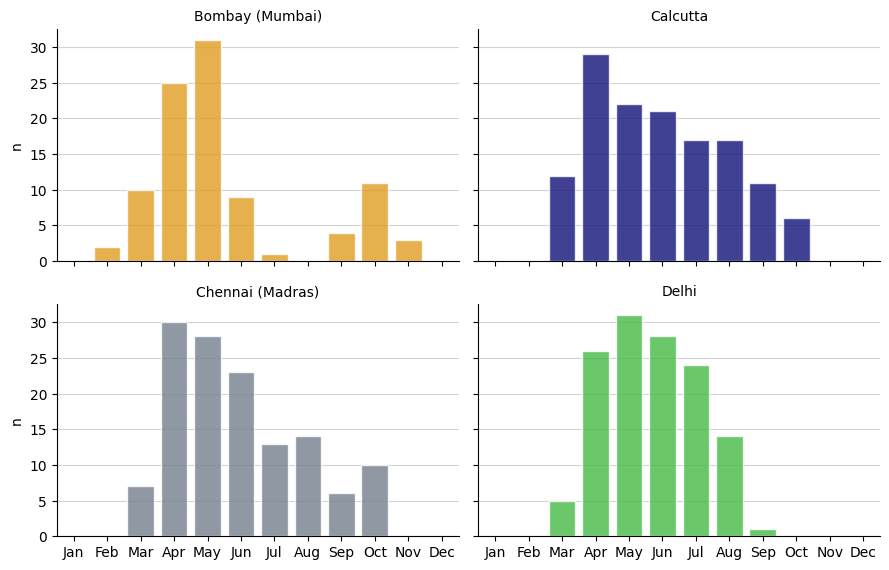

In [21]:
# Create faceted bar plot
g = sns.FacetGrid(india_hot_days,
                 col='City', # Columns
                 hue='City', # Color
                 palette=['orange', 'darkblue', 'slategrey', 'limegreen'],
                 col_wrap=2,  # 2 rows
                 height=3,
                 aspect=1.5)

# Add bars to each facet
g.map_dataframe(sns.barplot,
                x='Month',
                y='n',
                edgecolor='white',
                alpha=0.8,
                zorder=2)

# Set title
g.set_titles(col_template="{col_name}")

# Add grid lines
g.map(plt.grid, axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove x-axis label
for ax in g.axes:
    ax.set_xlabel('')

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Stacked Bars

<img src="https://i.imgur.com/Xyvmbu1.png" width=700 />

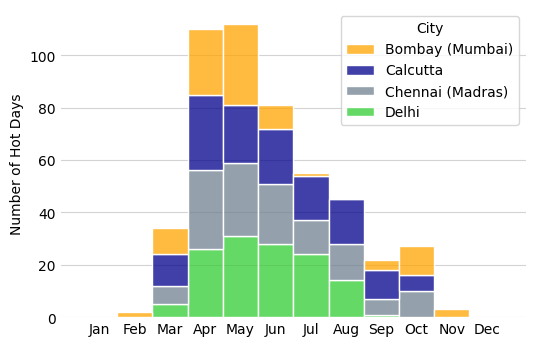

In [22]:
plt.figure(figsize=(6, 4))

# Make a barplot (here we use histplot for stacked bars)
sns.histplot(data=india_hot_days,
            x='Month',
            weights='n',
            hue='City',
            palette=['orange', 'darkblue', 'slategrey', 'limegreen'],
            multiple="stack",
            edgecolor='white',
            zorder=2)

# Set labels
plt.xlabel('')
plt.ylabel('Number of Hot Days')

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<font size=2>The color in `histplot` is more vibrant compared to the one in barplot. `barplot` applies a different color transformation, making colors more muted. `histplot` keeps colors closer to original but applies 0.75 alpha (transparency).</font>

<img src="https://i.imgur.com/pk8IIVp.png" width=700 />

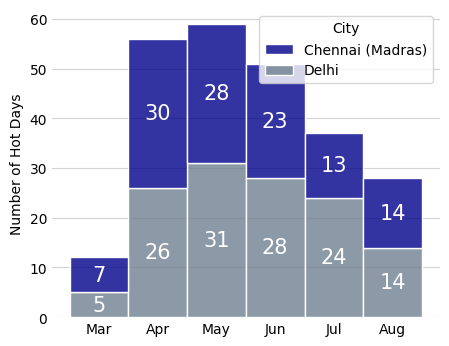

In [23]:
# Filter the data for specific cities and months
india_hot_days_few = india_hot_days[
   (india_hot_days['City'].isin(['Chennai (Madras)', 'Delhi'])) &
   (india_hot_days['Month'].isin(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']))
]

plt.figure(figsize=(5, 4))

ax = sns.histplot(data=india_hot_days_few,
            x='Month',
            weights='n',
            hue='City',
            palette=['darkblue', 'slategrey'],
            multiple="stack",
            alpha=0.8,
            edgecolor='white',
            zorder=2)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=15)

# Set labels
plt.xlabel('')
plt.ylabel('Number of Hot Days')

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>  Practice 2.2 ᆢ</strong></font>ᆢᆢ
The following grouped bar is not the best to show the total alcohol consumption of some Western European countries throughout the years. Change it so it is easier to see the increase of each country.


In [24]:
# Define the countries and their colors
west_europe = ["Belgium", "France", "Netherlands", "Ireland"]
west_europe_color = ["gray", "dodgerblue", "orangered", "darkorange"]

# Filter and select the data
alcohol_consumption = (life_expectancy[
    (life_expectancy['Country'].isin(west_europe)) &
    (life_expectancy['Year'].between(2000, 2010))
][['Country', 'Year', 'Alcohol_consumption']]
.dropna())

print(alcohol_consumption.head(12))

         Country  Year  Alcohol_consumption
126      Ireland  2000                13.84
133      Belgium  2002                11.29
232       France  2009                12.66
258  Netherlands  2005                 9.50
278       France  2000                13.92
326  Netherlands  2001                 9.82
400       France  2003                13.45
452      Ireland  2010                11.57
534  Netherlands  2008                 9.51
767       France  2006                13.05
776      Ireland  2001                14.04
785       France  2005                12.88


<Figure size 800x300 with 0 Axes>

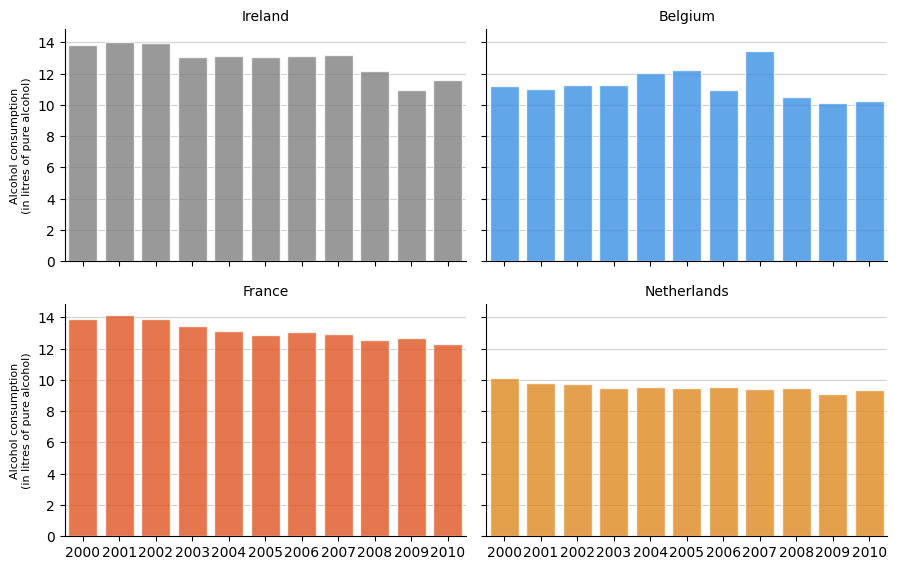

In [ ]:
# Set figure size
plt.figure(figsize=(8, 3))

# Create faceted bar plot
g = sns.FacetGrid(alcohol_consumption,
                 col='Country', # Columns
                 hue='Country', # Color
                 palette=west_europe_color,
                 col_wrap=2,  # 2 rows
                 height=3,
                 aspect=1.5)

# Add bars to each facet
g.map_dataframe(sns.barplot,
                x='Year',
                y='Alcohol_consumption',
                edgecolor='white',
                alpha=0.8,
                zorder=2)

# Set title
g.set_titles(col_template="{col_name}")

# Add grid lines
g.map(plt.grid, axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove x-axis label
for ax in g.axes:
    ax.set_xlabel('')
    ax.set_ylabel('Alcohol consumption\n(in litres of pure alcohol)',fontsize=8)

# plt.show()

## <font color="#B0AD89"><strong>2.3 ⫶ </strong></font>Dot plots and heatmaps


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Dot plots

<img src="https://i.imgur.com/rbNmZUe.png" width=700 />

<img src="https://i.imgur.com/GvNKrxz.png" width=700 />

In [32]:
# Define Southeast Asian countries
SE_Asia = [
   "Indonesia", "Timor-Leste", "Thailand", "Malaysia", "Viet Nam",
   "Singapore", "Myanmar", "Cambodia", "Philippines", "Brunei Darussalam"
]

# Filter and select the data
SE_Asia_life_exp = (life_expectancy[
   (life_expectancy['Year'] == 2014) &
   (life_expectancy['Country'].isin(SE_Asia))
][['Country', 'Life_expectancy']]
).sort_values('Life_expectancy', ascending=False)

print(SE_Asia_life_exp)

                Country  Life_expectancy
40            Singapore             82.5
1020           Thailand             75.7
1913           Malaysia             75.3
1610  Brunei Darussalam             75.2
1021        Philippines             70.5
2123          Indonesia             70.5
1433           Cambodia             68.3
2388        Timor-Leste             68.2
725             Myanmar             65.4


╔ 👎 BAD! ═══════════════════════════════


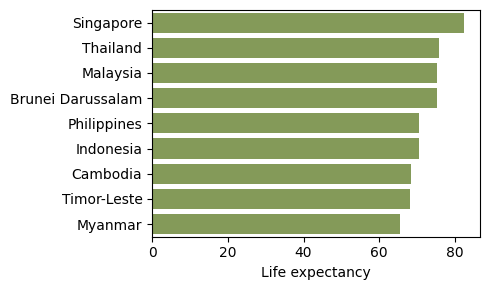

In [33]:
# Print the BAD notification
print(BAD)

# Set figure size
plt.figure(figsize=(5, 3))

# Create horizontal bar plot
sns.barplot(data=SE_Asia_life_exp,
           x='Life_expectancy',
           y='Country',
           color='olivedrab',
           alpha=0.8)

# Set labels
plt.xlabel('Life expectancy')
plt.ylabel('')

# Adjust layout
plt.tight_layout()

plt.show()

<img src="https://i.imgur.com/1MCmGOG.png" width=700 />

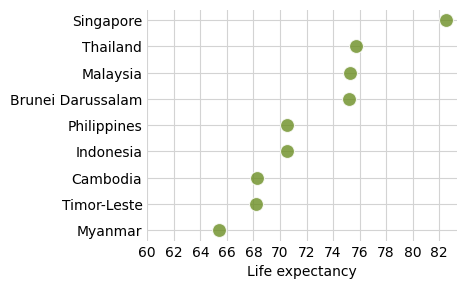

In [34]:
# Set figure size
plt.figure(figsize=(4, 3))

# Create horizontal bar plot
sns.scatterplot(data=SE_Asia_life_exp,
                x='Life_expectancy',
                y='Country',
                color='olivedrab',
                alpha=0.8,
                s=100,
                zorder=2)

# Set labels
plt.xlabel('Life expectancy')
plt.ylabel('')

# Set x-axis ticks every 2 units
plt.xticks(np.arange(60, 84, 2))  # From 60 to 80, step of 2

# Set y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/rymCCZU.png" width=700 />

╔ 👎 BAD! ═══════════════════════════════


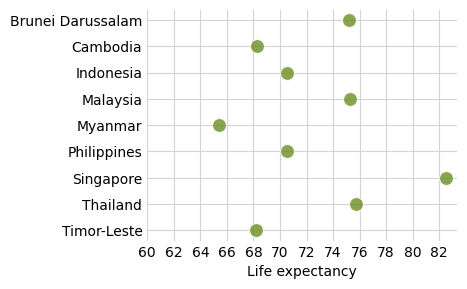

In [35]:
print(BAD)

# Set figure size
plt.figure(figsize=(4, 3))

# Create horizontal bar plot
sns.scatterplot(data=SE_Asia_life_exp.sort_values('Country'),
                x='Life_expectancy',
                y='Country',
                color='olivedrab',
                alpha=0.8,
                s=100,
                zorder=2)

# Set labels
plt.xlabel('Life expectancy')
plt.ylabel('')

# Set x-axis ticks every 2 units
plt.xticks(np.arange(60, 84, 2))  # From 60 to 80, step of 2

# Set y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Heatmap

<img src="https://i.imgur.com/sGubrdE.png" width=700 />

<img src="https://i.imgur.com/yvZc5gf.png" width=700 />

In [36]:
# Define Southeast Asian countries
SE_Asia = ["Indonesia", "Timor-Leste", "Thailand", "Malaysia",
          "Viet Nam", "Cambodia", "Philippines"]

# Filter and select data
SE_Asia_life_exp = (life_expectancy[
   life_expectancy['Country'].isin(SE_Asia)
][['Year', 'Country', 'Life_expectancy']])

# Create a pivot table for the heatmap
heatmap_data = SE_Asia_life_exp.pivot(index='Country',
                                    columns='Year',
                                    values='Life_expectancy').sort_values(2000, ascending=False)

# Sort countries by average life expectancy
#country_order = SE_Asia_life_exp.groupby('Country')['Life_expectancy'].mean().sort_values().index

print(heatmap_data)

Year         2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
Country                                                                         
Malaysia     72.6  72.8  73.0  73.2  73.4  73.6  73.7  73.9  74.1  74.3  74.5   
Thailand     70.6  70.8  71.1  71.4  71.7  72.1  72.5  72.9  73.3  73.8  74.2   
Philippines  68.8  68.8  68.9  68.9  69.0  69.1  69.2  69.4  69.5  69.7  69.8   
Indonesia    65.8  66.0  66.3  66.6  67.0  67.3  67.7  68.1  68.5  68.9  69.2   
Timor-Leste  59.0  59.9  60.9  61.9  62.9  63.9  64.8  65.6  66.3  66.8  67.2   
Cambodia     58.4  59.3  60.3  61.2  62.2  63.1  63.9  64.7  65.4  66.0  66.6   

Year         2011  2012  2013  2014  2015  
Country                                    
Malaysia     74.7  74.9  75.1  75.3  75.5  
Thailand     74.6  75.0  75.4  75.7  76.1  
Philippines  70.0  70.1  70.3  70.5  70.6  
Indonesia    69.5  69.9  70.2  70.5  70.8  
Timor-Leste  67.5  67.7  68.0  68.2  68.5  
Cambodia     67.0  67.5  67.9  68.3  68.6  

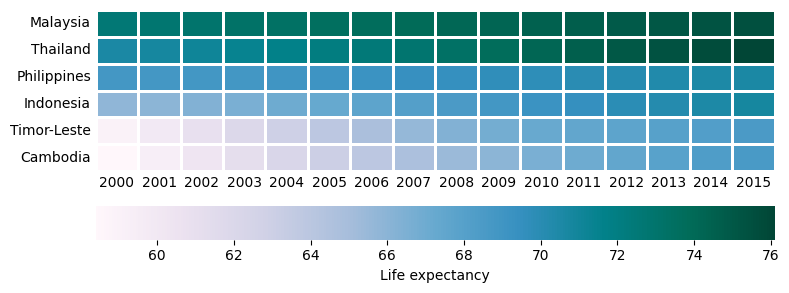

In [38]:
# Set figure size
plt.figure(figsize=(8, 3))


# Create heatmap
sns.heatmap(heatmap_data,
           cmap='PuBuGn',
           linewidths=1,
           linecolor='white',
           cbar_kws={'label': 'Life expectancy',
                    'orientation': 'horizontal'})

# Customize axes
plt.xlabel('')
plt.ylabel('')

# Remove ticks
plt.gca().tick_params(length=0)

# Adjust layout
plt.tight_layout()

plt.show()

## <font color="#B0AD89"><strong>  Practice 2.3 ᆢ</strong></font>ᆢᆢ
The following graph shows the GDP of some developed countries in the year of 2000. Fix the graph.

In [39]:
# Define developed countries
developed_countries = ["Canada", "France", "Germany", "Sweden", "Finland",
                     "Japan", "Luxembourg", "Switzerland"]

# Filter and select data
developed_GDP = (life_expectancy[
   (life_expectancy['Year'] == 2000) &
   (life_expectancy['Country'].isin(developed_countries))
][['Country', 'GDP_per_capita']])

print(developed_GDP)

          Country  GDP_per_capita
278        France           33597
565         Japan           31431
682    Luxembourg           92528
953       Germany           34490
1430      Finland           37884
1847  Switzerland           74013
1957       Sweden           41117
2659       Canada           34122


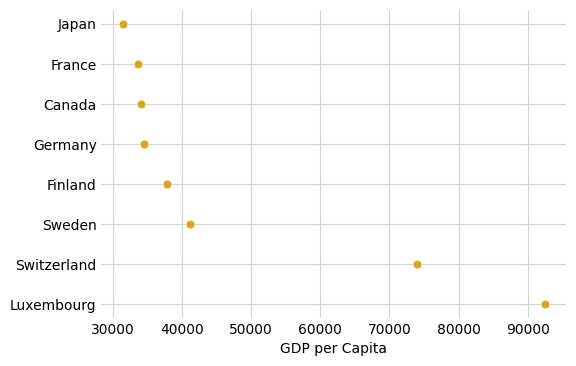

In [53]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create scatter plot
sns.scatterplot(data=developed_GDP.sort_values("GDP_per_capita"),
                x='GDP_per_capita',
                y='Country',
                s=40,
                color='goldenrod',
                zorder=2)

# Set y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Set x-axis ticks every 2 units
plt.xticks(np.arange(30000, 100000, 10000))

plt.ylabel('')
plt.xlabel("GDP per Capita")

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

# <font color="#B0AD89"><strong>Part B ⫶⫶ </strong></font>Visualizing Distribution

<img src="https://i.imgur.com/vw5OFNj.png" width=700 />

## <font color="#B0AD89"><strong>2.4 ⫶ </strong></font>Histograms and Density Plot

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Histograms

<img src="https://i.imgur.com/ovp1KDl.png" width=700 />

<img src="https://i.imgur.com/DD391fi.png" width=700 />

In [54]:
# Filter for Tokyo's temperature data in 2010
tokyo_temperature = (city_temperature[
   (city_temperature['Year'] == 2010) &
   (city_temperature['City'] == "Tokyo")
])

print(tokyo_temperature)

       Region Country State   City  Month  Day  Year  AvgTemperature
382862   Asia   Japan   NaN  Tokyo      1    1  2010            42.3
382863   Asia   Japan   NaN  Tokyo      1    2  2010            44.9
382864   Asia   Japan   NaN  Tokyo      1    3  2010            43.7
382865   Asia   Japan   NaN  Tokyo      1    4  2010            44.7
382866   Asia   Japan   NaN  Tokyo      1    5  2010            44.7
...       ...     ...   ...    ...    ...  ...   ...             ...
383222   Asia   Japan   NaN  Tokyo     12   27  2010            44.6
383223   Asia   Japan   NaN  Tokyo     12   28  2010            47.0
383224   Asia   Japan   NaN  Tokyo     12   29  2010            46.7
383225   Asia   Japan   NaN  Tokyo     12   30  2010            41.2
383226   Asia   Japan   NaN  Tokyo     12   31  2010            42.5

[365 rows x 8 columns]


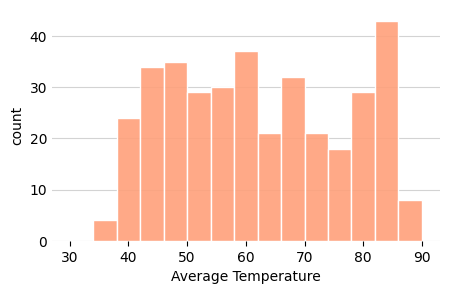

In [55]:
# Set figure size
plt.figure(figsize=(5, 3))

# Create histogram
sns.histplot(data=tokyo_temperature,
             x='AvgTemperature',
             bins=range(30, 91, 4),
             color='lightsalmon',
             edgecolor='white',
             alpha=0.9,
             zorder=2)

# Start y-axis at 0
plt.gca().set_ylim(bottom=0)

# Set labels
plt.xlabel('Average Temperature')
plt.ylabel('count')

# Set major and minor y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

<img src="https://i.imgur.com/tA84oVH.png" width=700 />

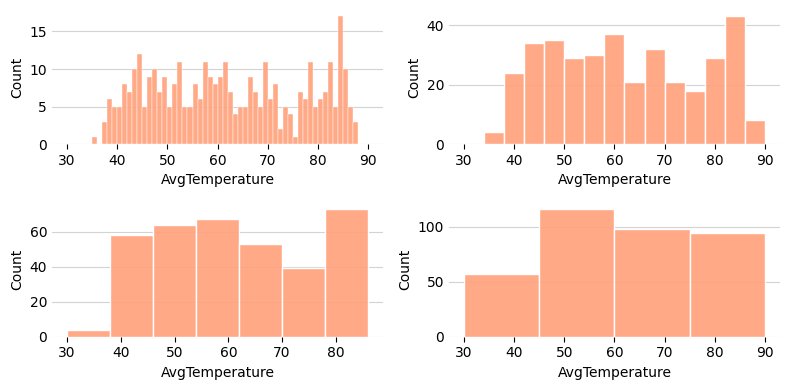

In [56]:
# Create figure with 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 4))

# Plot histograms with different bin widths
# a.
sns.histplot(ax=ax1,
             data=tokyo_temperature,
             x='AvgTemperature',
             bins=range(30, 91, 1),
             color='lightsalmon',
             edgecolor='white',
             alpha=0.9,
             zorder=2)
ax1.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)
ax1.spines[['top','right','left','bottom']].set_visible(False)
ax1.tick_params(axis='y', length=0)

# b.
sns.histplot(ax=ax2,
             data=tokyo_temperature,
             x='AvgTemperature',
             bins=range(30, 91, 4),
             color='lightsalmon',
             edgecolor='white',
             alpha=0.9,
             zorder=2)
ax2.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)
ax2.spines[['top','right','left','bottom']].set_visible(False)
ax2.tick_params(axis='y', length=0)

# c.
sns.histplot(ax=ax3,
             data=tokyo_temperature,
             x='AvgTemperature',
             bins=range(30, 91, 8),
             color='lightsalmon',
             edgecolor='white',
             alpha=0.9,
             zorder=2)
ax3.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)
ax3.spines[['top','right','left','bottom']].set_visible(False)
ax3.tick_params(axis='y', length=0)

# d.
sns.histplot(ax=ax4,
             data=tokyo_temperature,
             x='AvgTemperature',
             bins=range(30, 91, 15),
             color='lightsalmon',
             edgecolor='white',
             alpha=0.9,
             zorder=2)
ax4.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)
ax4.spines[['top','right','left','bottom']].set_visible(False)
ax4.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Density plot

<img src="https://i.imgur.com/SNbM70Y.png" width=700 />

<img src="https://i.imgur.com/p1WoEFK.png" width=700 />

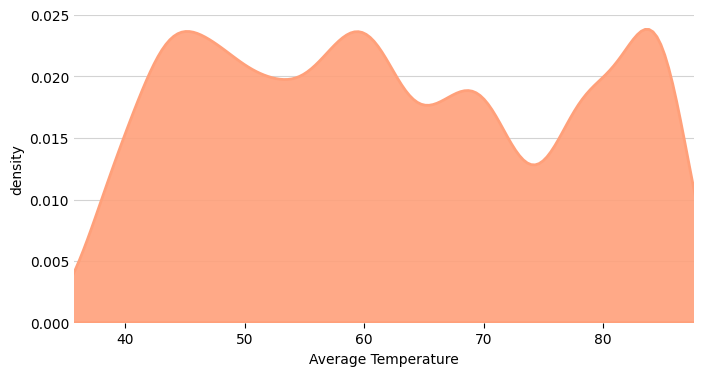

In [58]:
# Set figure size
plt.figure(figsize=(8, 4))

# Create density plot
sns.kdeplot(data=tokyo_temperature,
            x='AvgTemperature',
            color='lightsalmon',
            fill=True,
            bw_adjust=0.5,  # bandwidth adjustment
            alpha=0.9,
            linewidth=2,
            zorder=2)

# Set labels
plt.xlabel('Average Temperature')
plt.ylabel('density')

# Set x-axis limits
plt.xlim(tokyo_temperature['AvgTemperature'].min(),
         tokyo_temperature['AvgTemperature'].max())

# Set major and minor y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

<img src="https://i.imgur.com/HFKEFp2.png" width=700 />

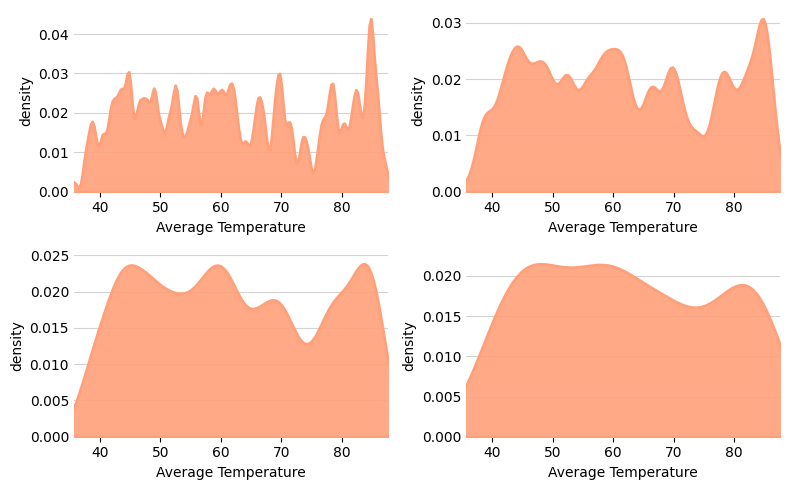

In [59]:
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Bandwidth adjustments and kernel types
bw_adjustments = [0.1, 0.25, 0.5, 1]

# Plot density plots on each subplot
sns.kdeplot(data=tokyo_temperature,
            x='AvgTemperature',
            ax=axes[0, 0],
            color='lightsalmon',
            fill=True,
            bw_adjust=bw_adjustments[0],
            alpha=0.9,
            linewidth=2,
            zorder=2)

sns.kdeplot(data=tokyo_temperature,
            x='AvgTemperature',
            ax=axes[0, 1],
            color='lightsalmon',
            fill=True,
            bw_adjust=bw_adjustments[1],
            alpha=0.9,
            linewidth=2,
            zorder=2)

sns.kdeplot(data=tokyo_temperature,
            x='AvgTemperature',
            ax=axes[1, 0],
            color='lightsalmon',
            fill=True,
            bw_adjust=bw_adjustments[2],
            alpha=0.9,
            linewidth=2,
            zorder=2)

sns.kdeplot(data=tokyo_temperature,
            x='AvgTemperature',
            ax=axes[1, 1],
            color='lightsalmon',
            fill=True,
            bw_adjust=bw_adjustments[3],
            alpha=0.9,
            linewidth=2,
            zorder=2)

# Set labels and grid for all subplots
for ax in axes.flat:
    ax.set_xlabel('Average Temperature')
    ax.set_ylabel('density')
    ax.set_xlim(tokyo_temperature['AvgTemperature'].min(), tokyo_temperature['AvgTemperature'].max())
    ax.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/W1OkFf8.png" width=700 />

╔ ❌ WRONG! ═══════════════════════════════


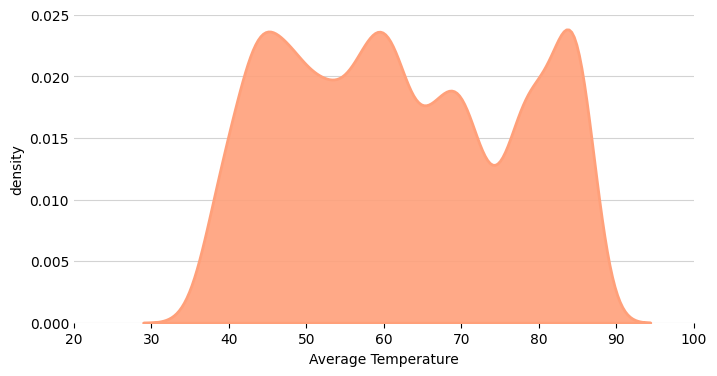

In [60]:
print(WRONG)

# Set figure size
plt.figure(figsize=(8, 4))

# Create density plot
sns.kdeplot(data=tokyo_temperature,
            x='AvgTemperature',
            color='lightsalmon',
            fill=True,
            bw_adjust=0.5,  # bandwidth adjustment
            alpha=0.9,
            linewidth=2,
            zorder=2)

# Set labels
plt.xlabel('Average Temperature')
plt.ylabel('density')

# Set x-axis limits
plt.xlim(20,100)

# Set major and minor y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

<img src="https://i.imgur.com/Gad4C8o.png" width=700 />

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Multiple distributions

<img src="https://i.imgur.com/wsrWz1l.png" width=700 />

<img src="https://i.imgur.com/71BACq1.png" width=700 />



In [61]:
# Filter for Tokyo and Sapporo temperature data in 2010
tokyo_sapporo_temperature = (city_temperature[
   (city_temperature['Year'] == 2010) &
   (city_temperature['City'].isin(['Tokyo', 'Sapporo']))
][['City', 'AvgTemperature']])

print(tokyo_sapporo_temperature)

           City  AvgTemperature
373596  Sapporo            31.6
373597  Sapporo            28.3
373598  Sapporo            24.8
373599  Sapporo            23.3
373600  Sapporo            29.2
...         ...             ...
383222    Tokyo            44.6
383223    Tokyo            47.0
383224    Tokyo            46.7
383225    Tokyo            41.2
383226    Tokyo            42.5

[730 rows x 2 columns]


<img src="https://i.imgur.com/iYonXWf.png" width=700 />



╔ 👎 BAD! ═══════════════════════════════


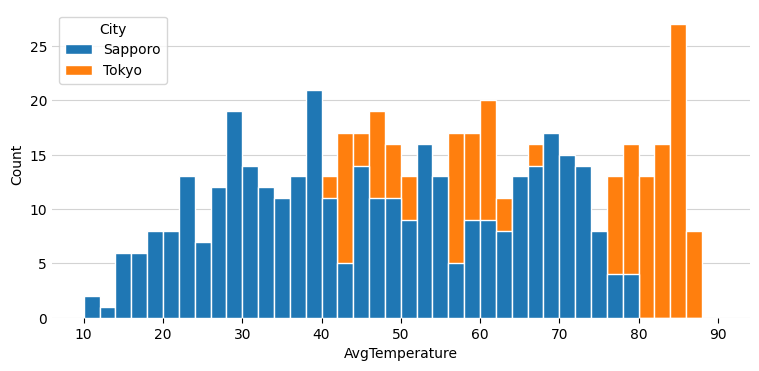

In [62]:
print(BAD)

plt.figure(figsize=(9, 4))

# Create overlapping histograms
sns.histplot(data=tokyo_sapporo_temperature,
             x='AvgTemperature',
             bins=range(10, 91, 2),
             hue='City',
             alpha=1,
             edgecolor='white',
             zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

╔ 👎 BAD! ═══════════════════════════════


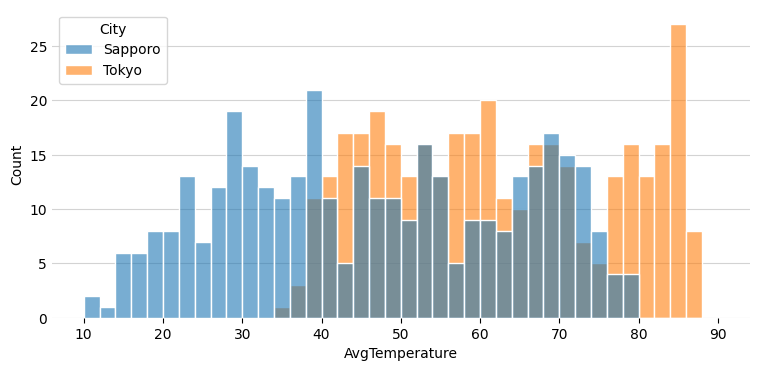

In [63]:
print(BAD)

plt.figure(figsize=(9, 4))

# Create overlapping histograms
sns.histplot(data=tokyo_sapporo_temperature,
             x='AvgTemperature',
             bins=range(10, 91, 2),
             hue='City',
             alpha=0.6,
             edgecolor='white',
             zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

<img src="https://i.imgur.com/QGkv1Js.png" width=700 />



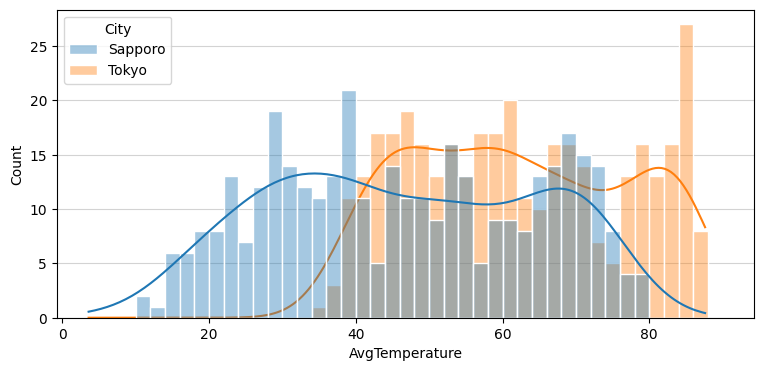

In [64]:
plt.figure(figsize=(9, 4))

# Create overlapping histograms
sns.histplot(data=tokyo_sapporo_temperature,
             x='AvgTemperature',
             bins=range(10, 91, 2),
             hue='City',
             alpha=0.4,
             edgecolor='white',
             kde=True,
             zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

plt.show()

<img src="https://i.imgur.com/MDzfgcm.png" width=700 />



In [65]:
# Create data with temperature ranges and counts
tokyo_sapporo_temperature = (city_temperature[
   (city_temperature['Year'] == 2010) &
   (city_temperature['City'].isin(['Tokyo', 'Sapporo']))
][['City', 'AvgTemperature']]
.assign(
   TemperatureRange=lambda x: pd.cut(x['AvgTemperature'],
                                    bins=range(10, 100, 5),
                                    right=True),
   count=lambda x: np.where(x['City'] == 'Tokyo', 1, -1)
)
.dropna())

# Calculate counts for each temperature range and city
grouped_data = tokyo_sapporo_temperature.groupby(['TemperatureRange', 'City']).size().unstack(fill_value=0).reset_index()
print(grouped_data)

City TemperatureRange  Sapporo  Tokyo
0            (10, 15]        5      0
1            (15, 20]       18      0
2            (20, 25]       25      0
3            (25, 30]       34      0
4            (30, 35]       31      0
5            (35, 40]       41     15
6            (40, 45]       26     43
7            (45, 50]       26     39
8            (50, 55]       28     35
9            (55, 60]       23     42
10           (60, 65]       24     35
11           (65, 70]       37     39
12           (70, 75]       35     23
13           (75, 80]       10     30
14           (80, 85]        0     48
15           (85, 90]        0     16
16           (90, 95]        0      0


/tmp/ipykernel_13470/1188722046.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = tokyo_sapporo_temperature.groupby(['TemperatureRange', 'City']).size().unstack(fill_value=0).reset_index()


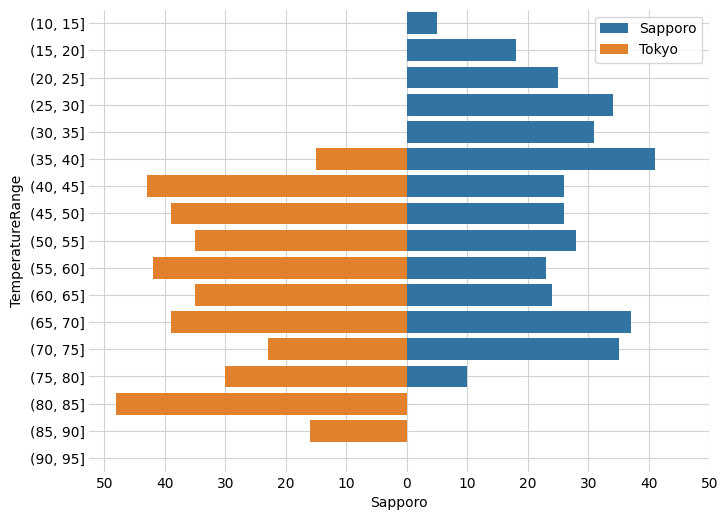

In [66]:
plt.figure(figsize=(8, 6))

# Make the pyramid plot using two barplots
sns.barplot(data=grouped_data,
             y='TemperatureRange',
             x=grouped_data['Sapporo'],
             label='Sapporo',
             zorder=2)

sns.barplot(data=grouped_data,
             y='TemperatureRange',
             x=grouped_data['Tokyo']*-1,
             label='Tokyo',
             zorder=2)

# Customize the ticks
plt.xticks(range(-50, 51, 10), [abs(x) for x in range(-50, 51, 10)])

# Set y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/escr56P.png" width=700 />



In [ ]:
# Filter for Tokyo, Sapporo and Osaka temperature data in 2010
japan_temperature = (city_temperature[
   (city_temperature['Year'] == 2010) &
   (city_temperature['City'].isin(['Tokyo', 'Sapporo', 'Osaka']))
][['City', 'AvgTemperature']])

print(japan_temperature)

         City  AvgTemperature
364330  Osaka            38.5
364331  Osaka            44.5
364332  Osaka            42.0
364333  Osaka            45.7
364334  Osaka            41.3
...       ...             ...
383222  Tokyo            44.6
383223  Tokyo            47.0
383224  Tokyo            46.7
383225  Tokyo            41.2
383226  Tokyo            42.5

[1095 rows x 2 columns]


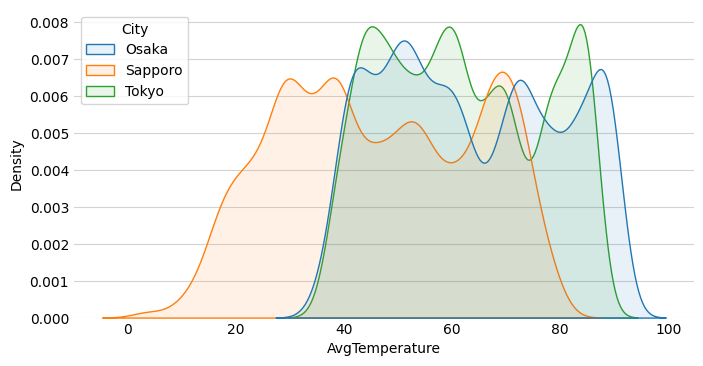

In [68]:
plt.figure(figsize=(8, 4))

sns.kdeplot(data=japan_temperature,
            x='AvgTemperature',
            hue='City',
            bw_adjust=0.5,
            fill=True,
            alpha=0.1,
            linewidth=1,
            zorder=2)

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>  Practice 2.4 ᆢ</strong></font>ᆢᆢ
We would like to know  the distribution of total year people around the globe stay in school for the year 2015 in developed and developing countries. Convert the following stacked bar graph into a histogram with kde plot.

In [69]:
# Filter and select schooling data
schooling_data = (life_expectancy[
   life_expectancy['Year'] == 2015
][['Country', 'Economy_status', 'Schooling']]
.dropna())

print(schooling_data)

                 Country Economy_status  Schooling
0                Turkiye     Developing        7.8
1                  Spain      Developed        9.7
6     Russian Federation     Developing       12.0
27              Cameroon     Developing        6.1
43           Gambia, The     Developing        3.4
...                  ...            ...        ...
2753             Tunisia     Developing        7.0
2820       Venezuela, RB     Developing       10.1
2840            Djibouti     Developing        4.1
2846           Nicaragua     Developing        6.5
2848             Bahrain     Developing        9.3

[179 rows x 3 columns]


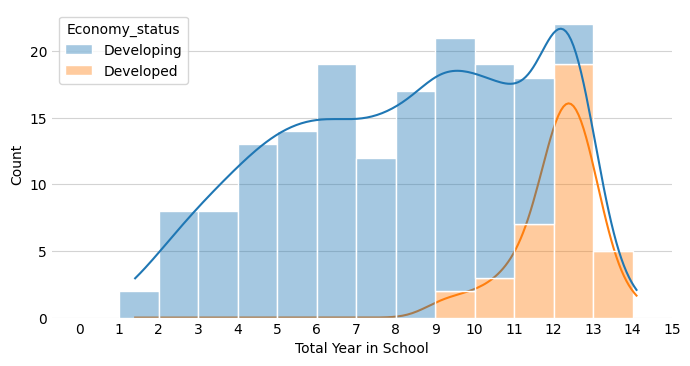

In [74]:
plt.figure(figsize=(8, 4))

# Create histogram
sns.histplot(data=schooling_data,
             x='Schooling',
             hue='Economy_status',
             bins=range(0, 15, 1),
             alpha=0.4,
             multiple='stack',
             edgecolor='white',
             kde=True,
             zorder=2)

# Add label
plt.xlabel('Total Year in School')
plt.ylabel('Count')

# Set y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Customize the ticks
plt.xticks(range(0,16,1))

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>2.5 ⫶ </strong></font>Empirical cumulative distribution functions and q-q plots


<img src="https://i.imgur.com/leSqf00.png" width=700 />

<img src="https://i.imgur.com/IxZK6I0.png" width=700 />



### <font color="#B0AD89"><strong>a ⬝ </strong></font>Empirical cumulative distribution functions



<img src="https://i.imgur.com/ZDsOjgb.png" width=700 />





In [43]:
# Create life expectancy rankings
world_life_expectancy = (life_expectancy[
   life_expectancy['Year'] == 2015
][['Country', 'Life_expectancy']]
.sort_values('Life_expectancy', ascending=False)
.reset_index(drop=True)
.assign(Country_rank=lambda x: x.index + 1))

print(world_life_expectancy)

                      Country  Life_expectancy  Country_rank
0                       Japan             83.8             1
1                 Switzerland             82.9             2
2                       Spain             82.8             3
3                   Singapore             82.7             4
4                     Iceland             82.5             5
..                        ...              ...           ...
174                   Nigeria             53.1           175
175                      Chad             53.1           176
176              Sierra Leone             52.9           177
177                   Lesotho             51.0           178
178  Central African Republic             50.9           179

[179 rows x 3 columns]



<img src="https://i.imgur.com/AR4pQ27.png" width=700 />





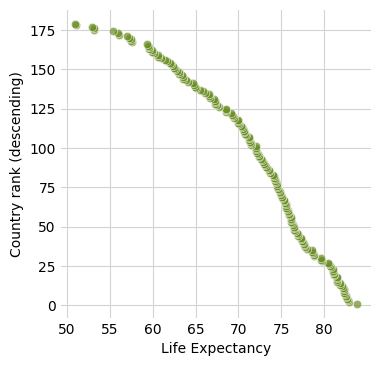

In [44]:
plt.figure(figsize=(4, 4))

sns.scatterplot(data=world_life_expectancy,
                x='Life_expectancy',
                y='Country_rank',
                color='olivedrab',
                alpha=0.7,
                zorder=2)

plt.xlabel('Life Expectancy')
plt.ylabel('Country rank (descending)')

# Set y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Customize the ticks
plt.xticks(range(50,81,5))

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()


<img src="https://i.imgur.com/ZZrMcOe.png" width=700 />





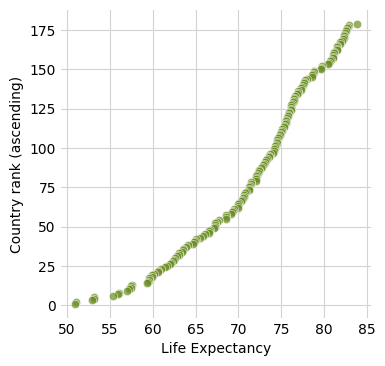

In [45]:
plt.figure(figsize=(4, 4))

sns.scatterplot(data=world_life_expectancy,
                x='Life_expectancy',
                y= world_life_expectancy['Country_rank'].max() - world_life_expectancy['Country_rank'] + 1,
                color='olivedrab',
                alpha=0.7,
                zorder=2)

plt.xlabel('Life Expectancy')
plt.ylabel('Country rank (ascending)')

# Set y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Customize the ticks
plt.xticks(range(50,86,5))

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()


<img src="https://i.imgur.com/9s2we01.png" width=700 />





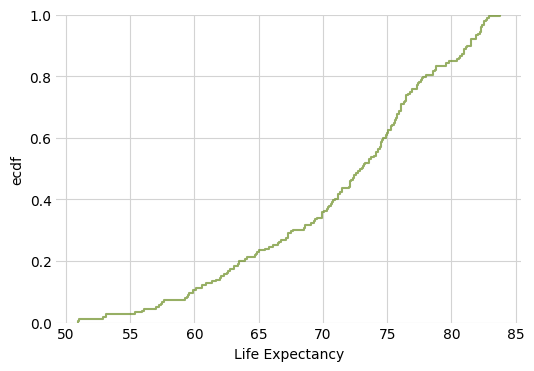

In [46]:
plt.figure(figsize=(6, 4))

sns.ecdfplot(data=world_life_expectancy,
             x='Life_expectancy',
             color='olivedrab',
             alpha=0.7,
             zorder=2)

plt.xlabel('Life Expectancy')
plt.ylabel('ecdf')

# Set y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Customize the ticks
plt.xticks(range(50,86,5))

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()


<img src="https://i.imgur.com/gRdsZTY.png" width=700 />






### <font color="#B0AD89"><strong>b ⬝ </strong></font>Highly skewed distribution


<img src="https://i.imgur.com/Yw6k2po.png" width=700 />






In [47]:
# Filter data for population in 2015
world_population = (life_expectancy[
   life_expectancy['Year'] == 2015
][['Country', 'Population_mln']])

print(world_population)

                 Country  Population_mln
0                Turkiye           78.53
1                  Spain           46.44
6     Russian Federation          144.10
27              Cameroon           23.30
43           Gambia, The            2.09
...                  ...             ...
2753             Tunisia           11.18
2820       Venezuela, RB           30.08
2840            Djibouti            0.91
2846           Nicaragua            6.22
2848             Bahrain            1.37

[179 rows x 2 columns]


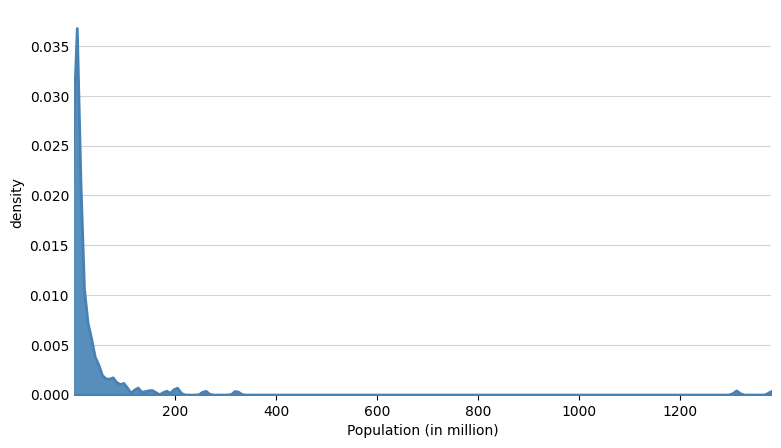

In [48]:
plt.figure(figsize=(9, 5))

# Create density plot
sns.kdeplot(data=world_population,
            x='Population_mln',
            color='steelblue',
            fill=True,
            bw_adjust=0.1,
            alpha=0.9,
            linewidth=2,
            zorder=2)

# Set labels
plt.xlabel('Population (in million)')
plt.ylabel('density')

# Set x-axis limits
plt.xlim(world_population['Population_mln'].min(),
         world_population['Population_mln'].max())

# Set major and minor y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

<img src="https://i.imgur.com/7K2VYAv.png" width=700 />

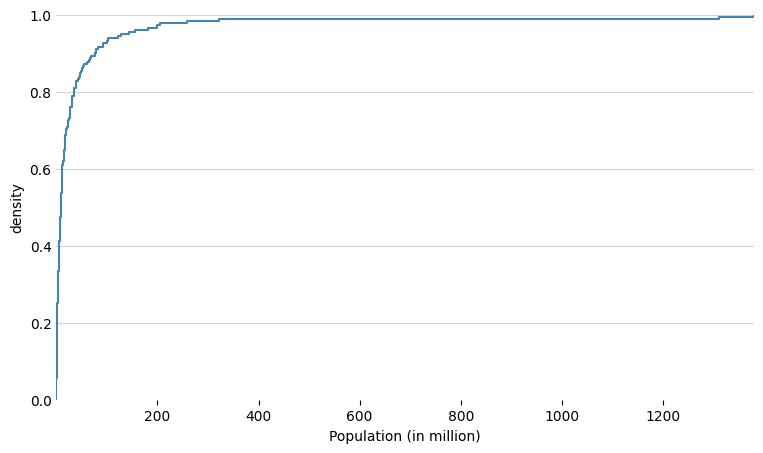

In [49]:
plt.figure(figsize=(9, 5))

# Create density plot
sns.ecdfplot(data=world_population,
             x='Population_mln',
             color='steelblue',
             zorder=2)

# Set labels
plt.xlabel('Population (in million)')
plt.ylabel('density')

# Set x-axis limits
plt.xlim(world_population['Population_mln'].min(),
         world_population['Population_mln'].max())

# Set major and minor y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

<img src="https://i.imgur.com/ZjRqWpQ.png" width=700 />

╔ 👎 BAD! ═══════════════════════════════


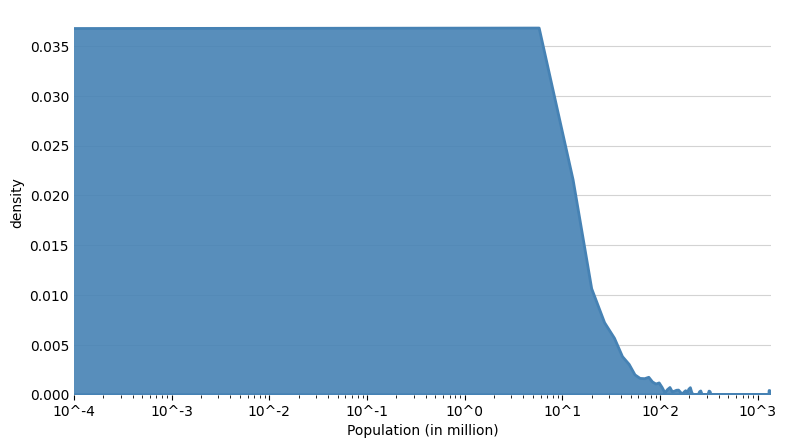

In [50]:
print(BAD)
plt.figure(figsize=(9, 5))

# Create density plot
sns.kdeplot(data=world_population,
            x='Population_mln',
            color='steelblue',
            fill=True,
            bw_adjust=0.1,
            alpha=0.9,
            linewidth=2,
            zorder=2)

# Set labels
plt.xlabel('Population (in million)')
plt.ylabel('density')

# Set x-axis limits
plt.xlim(world_population['Population_mln'].min(),
         world_population['Population_mln'].max())

# Set y-axis to log scale
plt.xscale('log')

# Customize y-axis ticks and labels
plt.xticks(ticks=[10**i for i in range(-4, 4)],
           labels=[f'10^{i}' for i in range(-4, 4)])

# Set major and minor y-axis grid
plt.grid(axis='y', color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

<img src="https://i.imgur.com/4KgHIrG.png" width=700 />

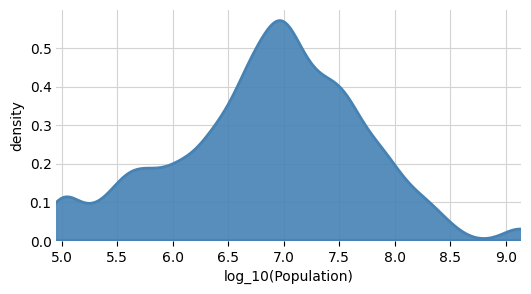

In [51]:
plt.figure(figsize=(6, 3))

# Create density plot
sns.kdeplot(data=world_population,
            x=np.log10(world_population['Population_mln']*1000000),
            color='steelblue',
            fill=True,
            bw_adjust=0.5,
            alpha=0.9,
            linewidth=2,
            zorder=2)

# Set labels
plt.xlabel('log_10(Population)')
plt.ylabel('density')

# Set x-axis limits
plt.xlim(np.log10(world_population['Population_mln']*1000000).min(),
         np.log10(world_population['Population_mln']*1000000).max())

# Set major and minor y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

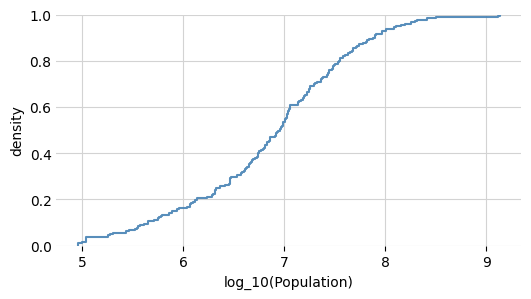

In [52]:
plt.figure(figsize=(6, 3))

# Create density plot
sns.ecdfplot(data=world_population,
            x=np.log10(world_population['Population_mln']*1000000),
            color='steelblue',
            alpha=0.9,
            zorder=2)

# Set labels
plt.xlabel('log_10(Population)')
plt.ylabel('density')

# Set major and minor y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(axis='y',length=0)

plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Quantile–quantile plots

<img src="https://i.imgur.com/udPkOWM.png" width=700 />


In [53]:
# Filter for 2014 life expectancy data
world_life_expectancy = (life_expectancy[
   life_expectancy['Year'] == 2014
][['Country', 'Life_expectancy']])

print(world_life_expectancy)

            Country  Life_expectancy
36     Saudi Arabia             74.5
40        Singapore             82.5
44       Costa Rica             79.4
47          Austria             81.5
72        Argentina             75.9
...             ...              ...
2695  Cote d'Ivoire             55.5
2702        Ecuador             75.9
2799           Fiji             67.0
2843       Kiribati             67.0
2856          Japan             83.6

[179 rows x 2 columns]


### <font color="#B0AD89"><strong>c ⬝ </strong></font>Quantile–quantile plots

<img src="https://i.imgur.com/QCMiXZz.png" width=700 />

<img src="https://i.imgur.com/N0kqYLO.png" width=700 />

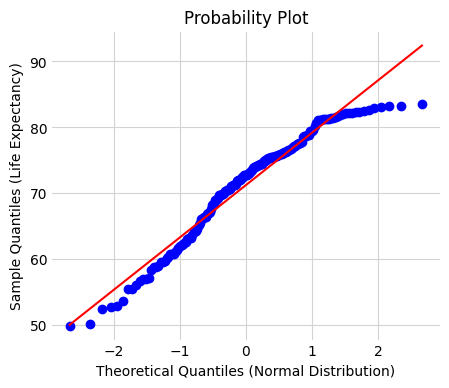

In [54]:
plt.figure(figsize=(5, 4))

# Simple Q-Q plot using scipy.stats.probplot
stats.probplot(world_life_expectancy['Life_expectancy'],
               plot=plt,
               dist='norm')

# Set label
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (Life Expectancy)')

# Set major and minor y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/CzCWGdq.png" width=700 />

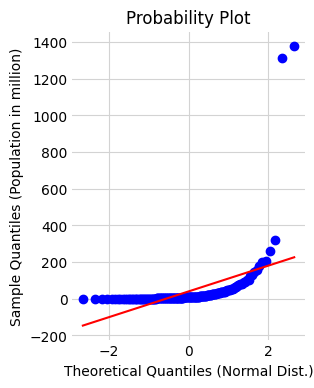

In [55]:
plt.figure(figsize=(3, 4))

# Simple Q-Q plot using scipy.stats.probplot
stats.probplot(world_population['Population_mln'],
               plot=plt)

# Set label
plt.xlabel('Theoretical Quantiles (Normal Dist.)')
plt.ylabel('Sample Quantiles (Population in million)')

# Set major and minor y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

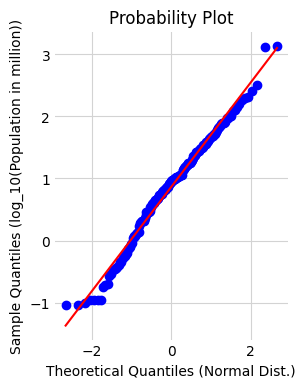

In [56]:
plt.figure(figsize=(3, 4))

# Simple Q-Q plot using scipy.stats.probplot
stats.probplot(np.log10(world_population['Population_mln']),
               plot=plt)

# Set label
plt.xlabel('Theoretical Quantiles (Normal Dist.)')
plt.ylabel('Sample Quantiles (log_10(Population in million))')

# Set major and minor y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>  Practice 2.5 ᆢ</strong></font>ᆢᆢ
We would like to know whether the world's GDP has a normal distribution. From the following q-q plot it seems not. Transform using `np.log10` and see if it is now normally distributed.

In [57]:
# Create DataFrame with GDP data for developing countries
developing_GDP = (life_expectancy[
   (life_expectancy['Year'] == 2001) &
   (life_expectancy['Economy_status'] == "Developing")
][['Country', 'GDP_per_capita']]
.dropna()
.sort_values('GDP_per_capita', ascending=False))


print(developing_GDP)

                   Country  GDP_per_capita
2291  United Arab Emirates           58422
1168                 Qatar           56916
586           Bahamas, The           36178
1398     Brunei Darussalam           34291
2044             Singapore           33598
...                    ...             ...
1331               Burundi             306
2002              Ethiopia             276
1668                Malawi             273
1126               Somalia             183
1693           Afghanistan             163

[142 rows x 2 columns]


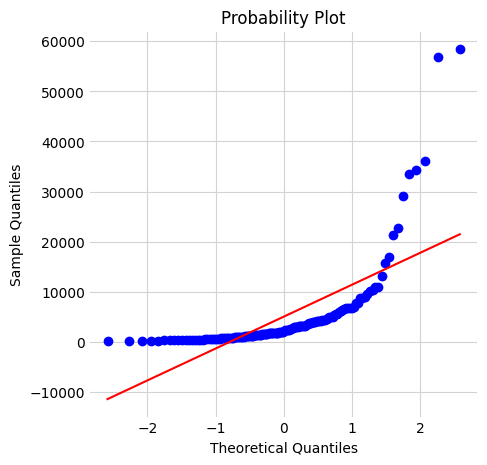

In [58]:
plt.figure(figsize=(5, 5))

# Simple Q-Q plot using scipy.stats.probplot
stats.probplot(developing_GDP['GDP_per_capita'],
               plot=plt)

# Set label
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Set major and minor y-axis grid
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()